In [49]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/twitter-tweets-sentiment-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\dima\.cache\kagglehub\datasets\yasserh\twitter-tweets-sentiment-dataset\versions\1


In [50]:
import sklearn
import keras
import nltk
import pandas as pd
import numpy as np
import re
import codecs

In [51]:
df = pd.read_csv("C:\\Users\\dima\\.cache\\kagglehub\\datasets\\yasserh\\twitter-tweets-sentiment-dataset\\versions\\1\\Tweets.csv")
df.tail()

textID                                               text  \
27476  4eac33d1c0   wish we could come see u on Denver  husband l...   
27477  4f4c4fc327   I`ve wondered about rake to.  The client has ...   
27478  f67aae2310   Yay good for both of you. Enjoy the break - y...   
27479  ed167662a5                         But it was worth it  ****.   
27480  6f7127d9d7     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  
27476                                             d lost  negative  
27477                                      , don`t force  negative  
27478                          Yay good for both of you.  positive  
27479                         But it was worth it  ****.  positive  
27480  All this flirting going on - The ATG smiles. Y...   neutral

In [52]:
df.describe()

textID                                  text selected_text  \
count        27481                                 27480         27480   
unique       27481                                 27480         22463   
top     cb774db0d1   I`d have responded, if I were going          good   
freq             1                                     1           199   

       sentiment  
count      27481  
unique         3  
top      neutral  
freq       11118

In [53]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

df = standardize_text(df, "text")
questions = standardize_text(df, "selected_text")

df.tail()

textID                                               text  \
27476  4eac33d1c0   wish we could come see u on denver  husband l...   
27477  4f4c4fc327   i`ve wondered about rake to.  the client has ...   
27478  f67aae2310   yay good for both of you. enjoy the break - y...   
27479  ed167662a5                         but it was worth it  ****.   
27480  6f7127d9d7     all this flirting going on - the atg smiles...   

                                           selected_text sentiment  
27476                                             d lost  negative  
27477                                      , don`t force  negative  
27478                          yay good for both of you.  positive  
27479                         but it was worth it  ****.  positive  
27480  all this flirting going on - the atg smiles. y...   neutral

In [54]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df["sentiment_"] = encoder.fit_transform(df[["sentiment"]]).astype(int)
df.tail()

textID                                               text  \
27476  4eac33d1c0   wish we could come see u on denver  husband l...   
27477  4f4c4fc327   i`ve wondered about rake to.  the client has ...   
27478  f67aae2310   yay good for both of you. enjoy the break - y...   
27479  ed167662a5                         but it was worth it  ****.   
27480  6f7127d9d7     all this flirting going on - the atg smiles...   

                                           selected_text sentiment  sentiment_  
27476                                             d lost  negative           0  
27477                                      , don`t force  negative           0  
27478                          yay good for both of you.  positive           2  
27479                         but it was worth it  ****.  positive           2  
27480  all this flirting going on - the atg smiles. y...   neutral           1

In [55]:
df.groupby("sentiment_").count()

textID   text  selected_text  sentiment
sentiment_                                         
0             7781   7781           7781       7781
1            11118  11117          11117      11118
2             8582   8582           8582       8582

In [56]:

df.isnull().sum()


textID           0
text             1
selected_text    1
sentiment        0
sentiment_       0
dtype: int64

In [57]:

df["text"] = df["text"].fillna("").astype(str)
df["selected_text"] = df["text"].fillna("").astype(str)
df.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
sentiment_       0
dtype: int64

 i`d have responded, if i were going  sooo sad i will miss you here in san diego!!! my boss is bullying me...  what interview! leave me alone  sons of ****, why couldn`t they put them on the releases we already bought ://www.dothebouncy.com/smf - some shameless plugging for the best rangers forum on earth 2am feedings for the baby are fun when he is all smiles and coos soooo high  both of you  journey!? wow... u just became cooler.  hehe... (is that possible!?)  as much as i love to be hopeful, i reckon the chances are minimal =p i`m never gonna get my cake and stuff i really really like the song love story by taylor swift my sharpie is running dangerously low on ink i want to go to music tonight but i lost my voice. test test from the lg env2 uh oh, i am sunburned  s`ok, trying to plot alternatives as we speak *sigh* i`ve been sick for the past few days  and thus, my hair looks wierd.  if i didnt have a hat on it would look... ://tinyurl.com/mnf4kw is back home now      gonna miss eve

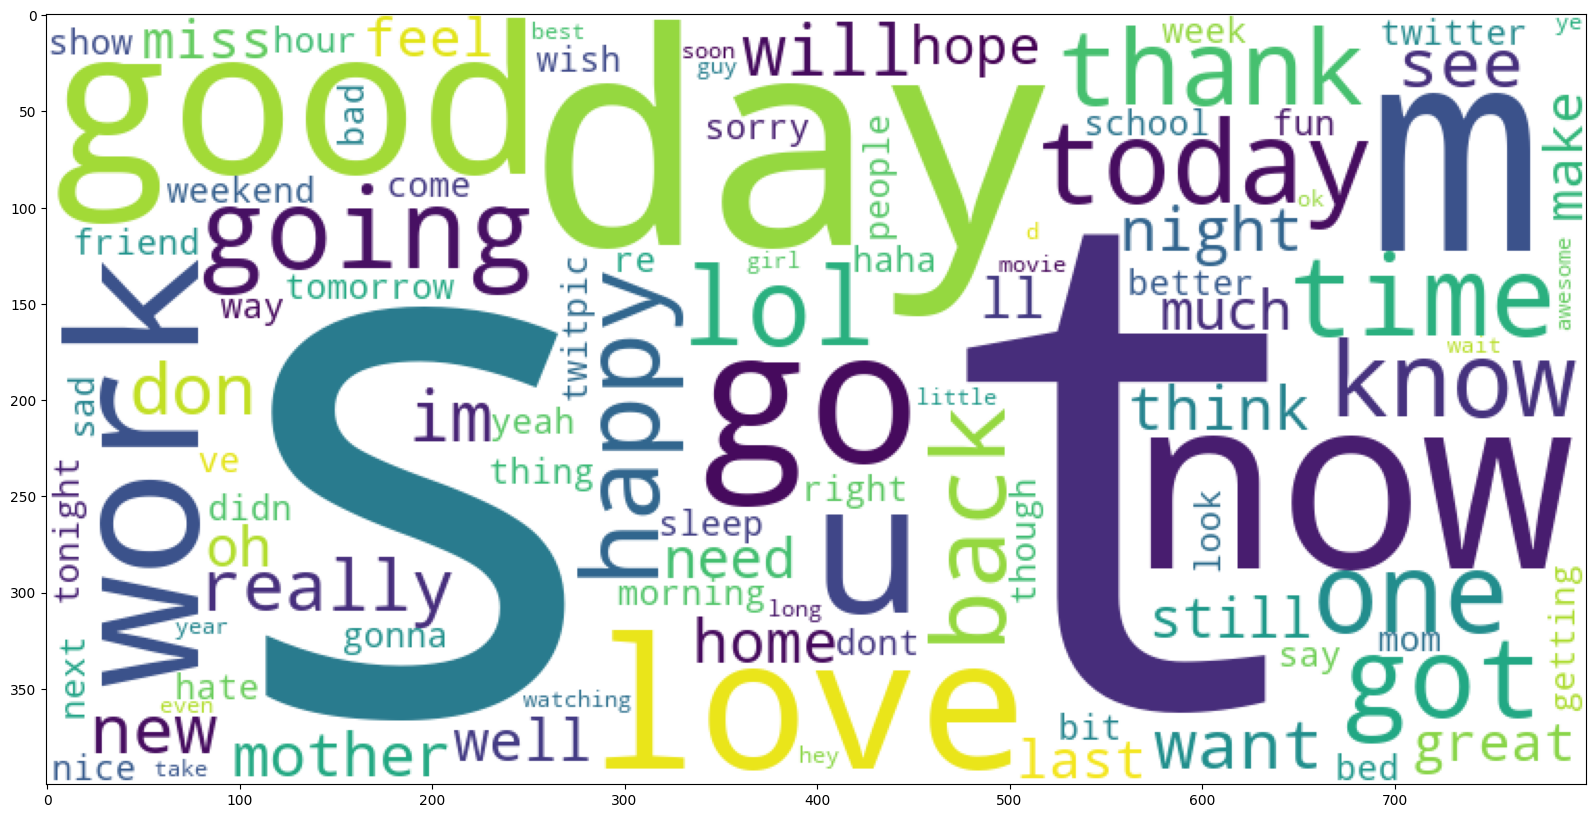

In [58]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

a = " ".join(df["text"])
print(a)

en_cloud = WordCloud(max_words=100, background_color='white',
                     width=800, height=400,
                     collocations=False).generate(a)
fig = plt.figure(figsize=(20, 10))
plt.imshow(en_cloud)

In [59]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

df["tokens"] = df["text"].apply(tokenizer.tokenize)
df.head()

textID                                               text  \
0  cb774db0d1                i`d have responded, if i were going   
1  549e992a42      sooo sad i will miss you here in san diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   sons of ****, why couldn`t they put them on t...   

                                       selected_text sentiment  sentiment_  \
0                i`d have responded, if i were going   neutral           1   
1      sooo sad i will miss you here in san diego!!!  negative           0   
2                          my boss is bullying me...  negative           0   
3                     what interview! leave me alone  negative           0   
4   sons of ****, why couldn`t they put them on t...  negative           0   

                                              tokens  
0        [i, d, have, responded, if, i, were, going]  
1  [sooo, sad, i, will, miss, you, here, in, san,...  
2                       [my, boss, is, bullying, me]  
3                [what, interview, leave, me, alone]  
4  [sons, of, why, couldn, t, they, put, them, on...

In [60]:
from tensorflow.keras.preprocessing.text import Tokenizer
from  keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in df["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

367556 words total, with a vocabulary size of 26477
Max sentence length is 39


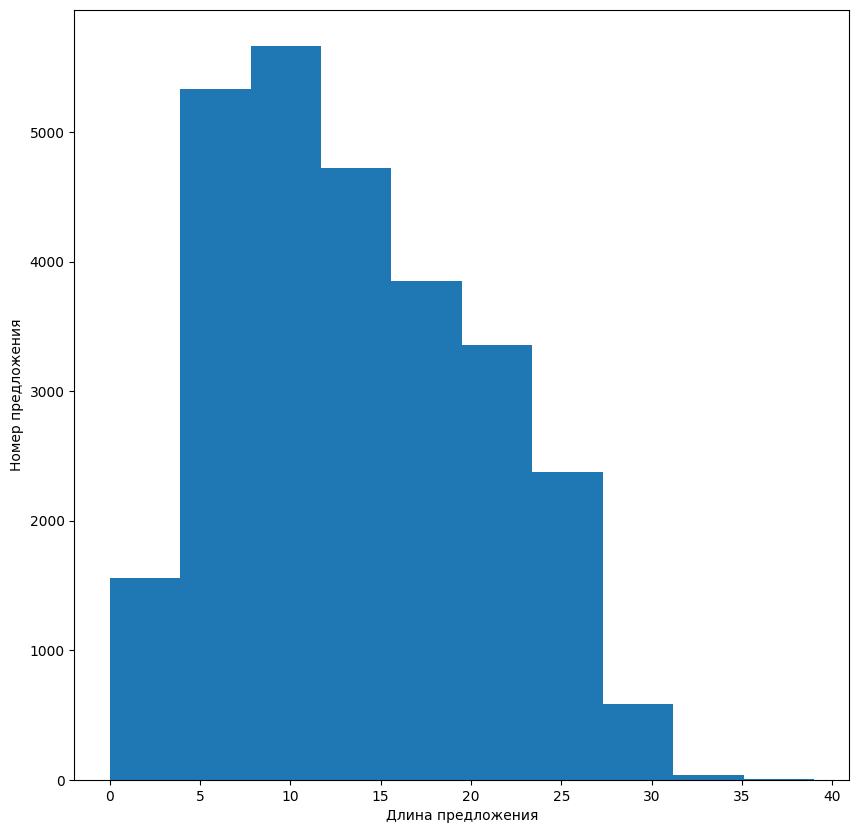

In [61]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.xlabel('Длина предложения')
plt.ylabel('Номер предложения')
plt.hist(sentence_lengths)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer() # матрица частот слов
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer



list_corpus = df["text"].tolist()
list_labels = df["sentiment_"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2,
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

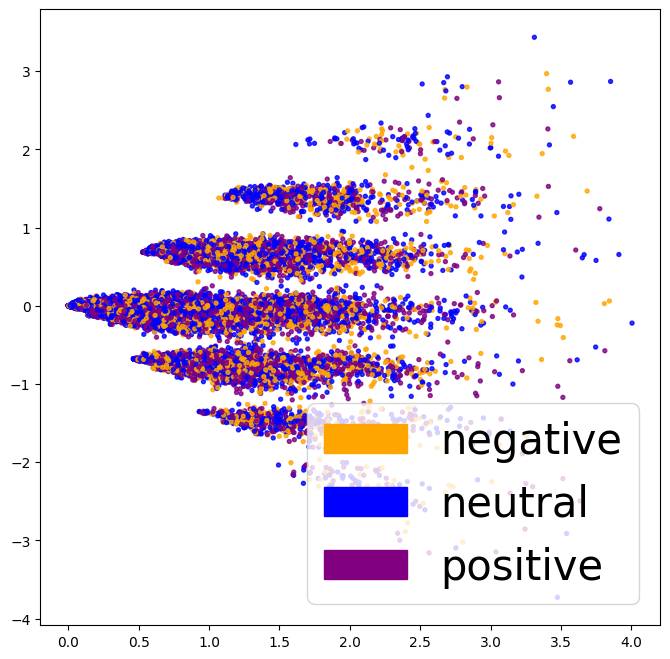

In [63]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=3)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','purple']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='negative')
            green_patch = mpatches.Patch(color='blue', label='neutral')
            purple_patch = mpatches.Patch(color='purple', label ='positive')
            plt.legend(handles=[red_patch, green_patch, purple_patch], prop={'size': 30})


fig = plt.figure(figsize=(8, 8))
plot_LSA(X_train_counts, y_train)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression  

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg',
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

C:\Users\dima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [65]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, r2_score, classification_report

def get_metrics(y_test, y_predicted):
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')

    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')

    r2 = r2_score(y_test, y_predicted)
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1, r2

accuracy, precision, recall, f1, r2 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f, r2 = %.3f" % (accuracy, precision, recall, f1,r2))

accuracy = 0.653, precision = 0.653, recall = 0.653, f1 = 0.653, r2 = 0.215


In [66]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)

    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

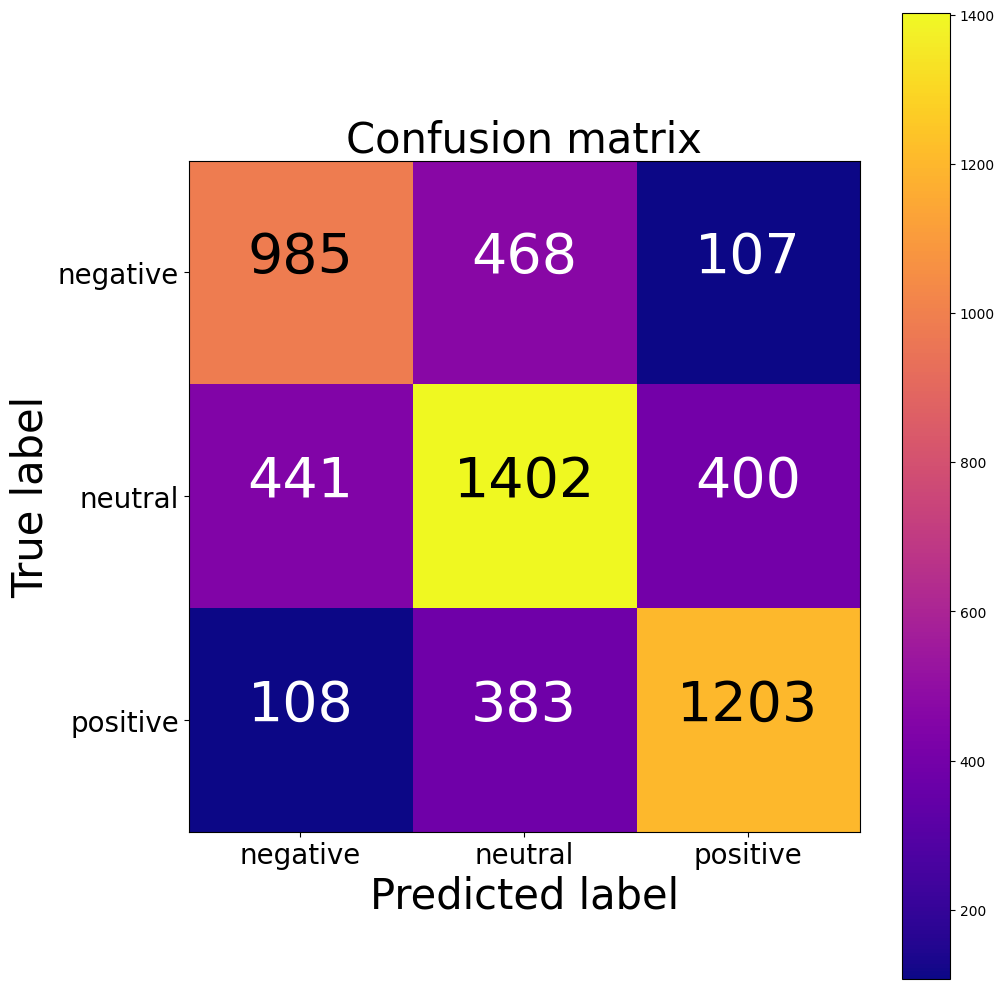

[[ 985  468  107]
 [ 441 1402  400]
 [ 108  383 1203]]


In [ ]:
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(6, 6))
plot = plot_confusion_matrix(cm, classes=['negative','neutral','positive'], normalize=False, title='Confusion matrix', cmap="plasma")
plt.show()
print(cm)

In [68]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}

    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)

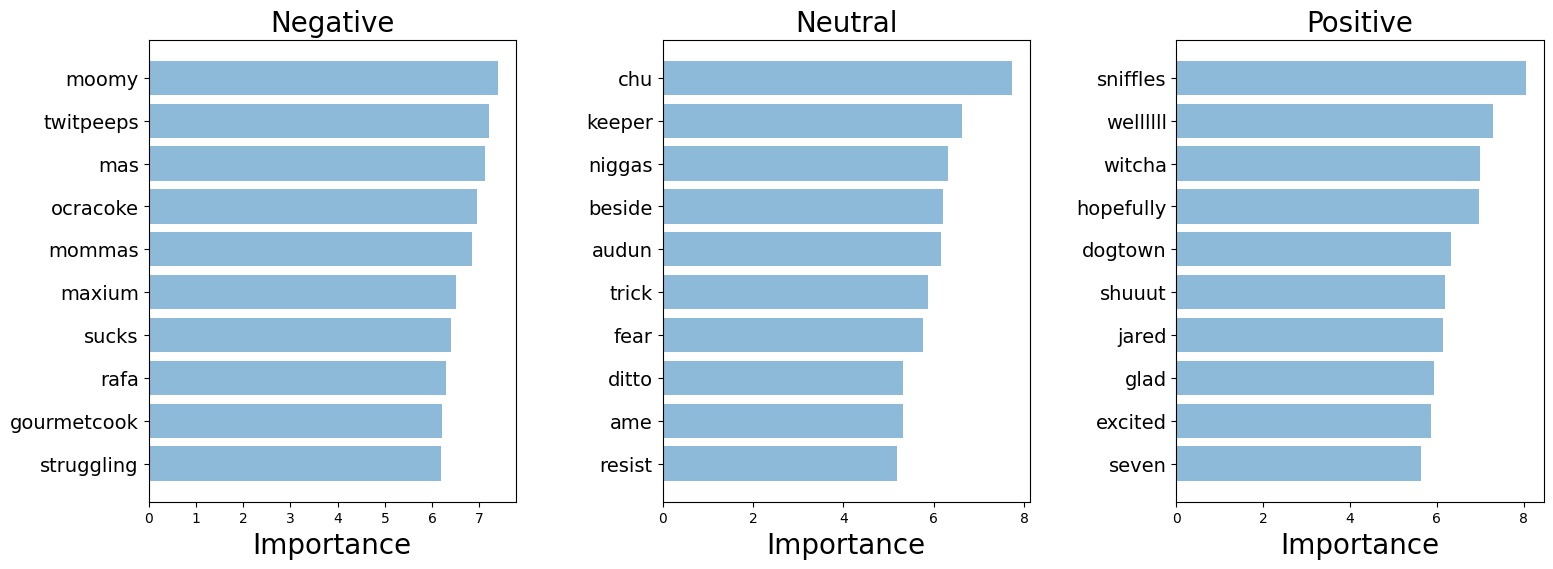

In [69]:
import numpy as np
import matplotlib.pyplot as plt

def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name, category_name, subplot_index):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])

    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)

    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]

    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]

    plt.subplot(1, 3, subplot_index)
    plt.barh(y_pos, top_scores, align='center', alpha=0.5)
    plt.title(category_name, fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.xlabel('Importance', fontsize=20)

# Извлечение данных для каждой категории
categories = {
    0: 'Negative',
    1: 'Neutral',
    2: 'Positive'
}

# Создаем фигуру для размещения всех графиков
plt.figure(figsize=(18, 6))

for category_index, category_name in categories.items():
    top_scores = [a[0] for a in importance[category_index]['tops']]
    top_words = [a[1] for a in importance[category_index]['tops']]
    bottom_scores = [a[0] for a in importance[category_index]['bottom']]
    bottom_words = [a[1] for a in importance[category_index]['bottom']]

    plot_important_words(top_scores, top_words, bottom_scores, bottom_words,  {category_name}, category_name, category_index + 1)


# Настраиваем пространство между графиками
plt.subplots_adjust(wspace=0.4)

# Отображаем графики
plt.show()

In [70]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

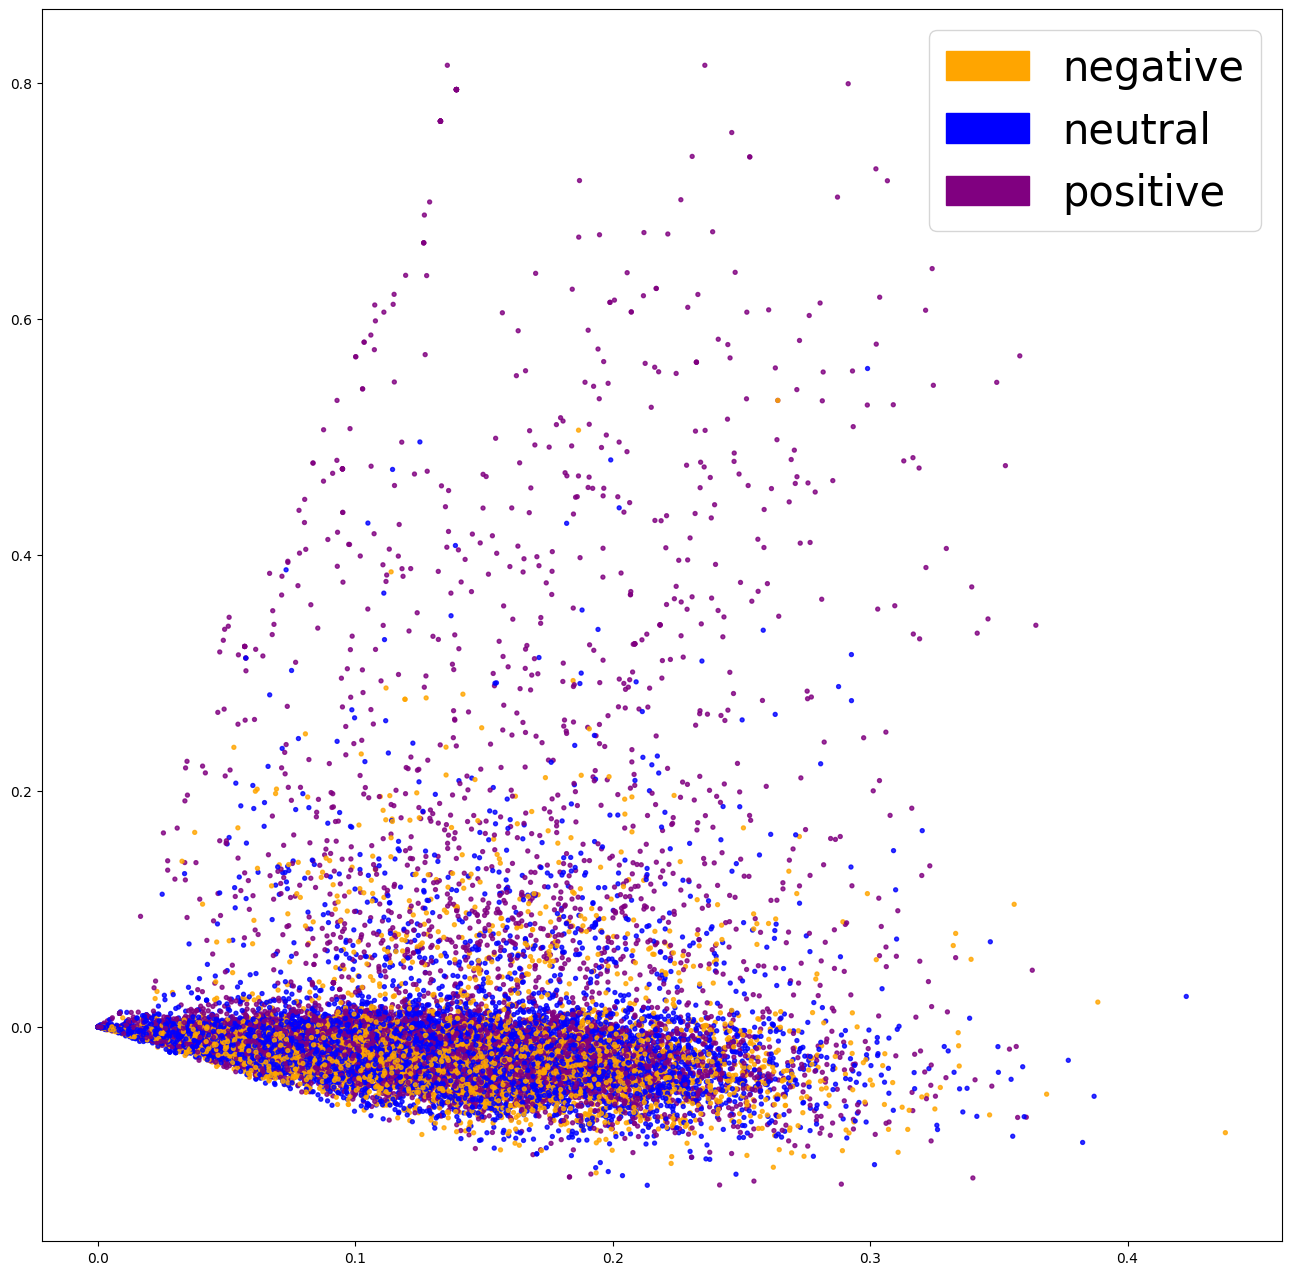

In [71]:
fig = plt.figure(figsize=(16, 16))
plot_LSA(X_train_tfidf, y_train)
plt.show()

In [72]:
clf_tfidf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg',
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf_tfidf.fit(X_train_tfidf, y_train)

y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

C:\Users\dima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [73]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf, r2_tfidf = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f, r2 = %.3f"  % (accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf, r2_tfidf))


accuracy = 0.664, precision = 0.664, recall = 0.664, f1 = 0.664, r2 = 0.244


In [74]:
cm2 = confusion_matrix(y_test, y_predicted_tfidf)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm2, classes=['negative','neutal','positive'], normalize=True, title='Confusion matrix', cmap="ocean")
plt.show()
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

TFIDF confusion matrix
[[1019  441  100]
 [ 447 1400  396]
 [ 104  358 1232]]
BoW confusion matrix
[[ 985  468  107]
 [ 441 1402  400]
 [ 108  383 1203]]


In [75]:
importance_tfidf = get_most_important_features(tfidf_vectorizer, clf_tfidf, 10)

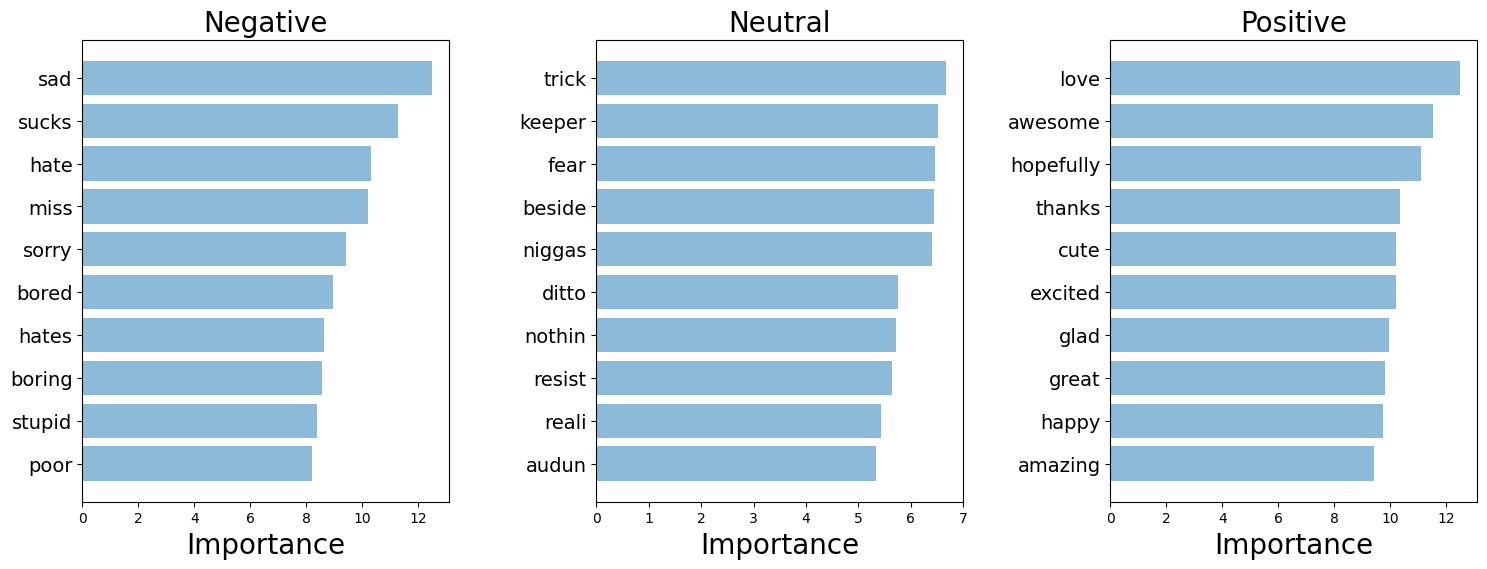

In [76]:
categories = {
    0: 'Negative',
    1: 'Neutral',
    2: 'Positive'
}

# Создаем фигуру для размещения всех графиков
plt.figure(figsize=(18, 6))

for category_index, category_name in categories.items():
    top_scores = [a[0] for a in importance_tfidf[category_index]['tops']]
    top_words = [a[1] for a in importance_tfidf[category_index]['tops']]
    bottom_scores = [a[0] for a in importance_tfidf[category_index]['bottom']]
    bottom_words = [a[1] for a in importance_tfidf[category_index]['bottom']]

    plot_important_words(top_scores, top_words, bottom_scores, bottom_words, category_name, category_name, category_index + 1)


# Настраиваем пространство между графиками
plt.subplots_adjust(wspace=0.4)

# Отображаем графики
plt.show()

In [77]:
import gensim

# Load Google's pre-trained Word2Vec model.
word2vec_path = "~/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, df, generate_missing=False):
    embeddings = df['tokens'].apply(lambda x: get_average_word2vec(x, vectors,
                                                                                generate_missing=generate_missing))
    return list(embeddings)

embeddings = get_word2vec_embeddings(word2vec, df)
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, list_labels,
                                                                                        test_size=0.2, random_state=40)

In [78]:
fig = plt.figure(figsize=(16, 16))
plot_LSA(embeddings, list_labels)
plt.show()

In [79]:
clf_w2v = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg',
                         multi_class='multinomial', random_state=40)
clf_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

C:\Users\dima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [80]:
accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec, r2_word2vec = get_metrics(y_test_word2vec, y_predicted_word2vec)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f, r2 = %.3f" % (accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec, r2_word2vec))

accuracy = 0.667, precision = 0.667, recall = 0.667, f1 = 0.667, r2 = 0.230


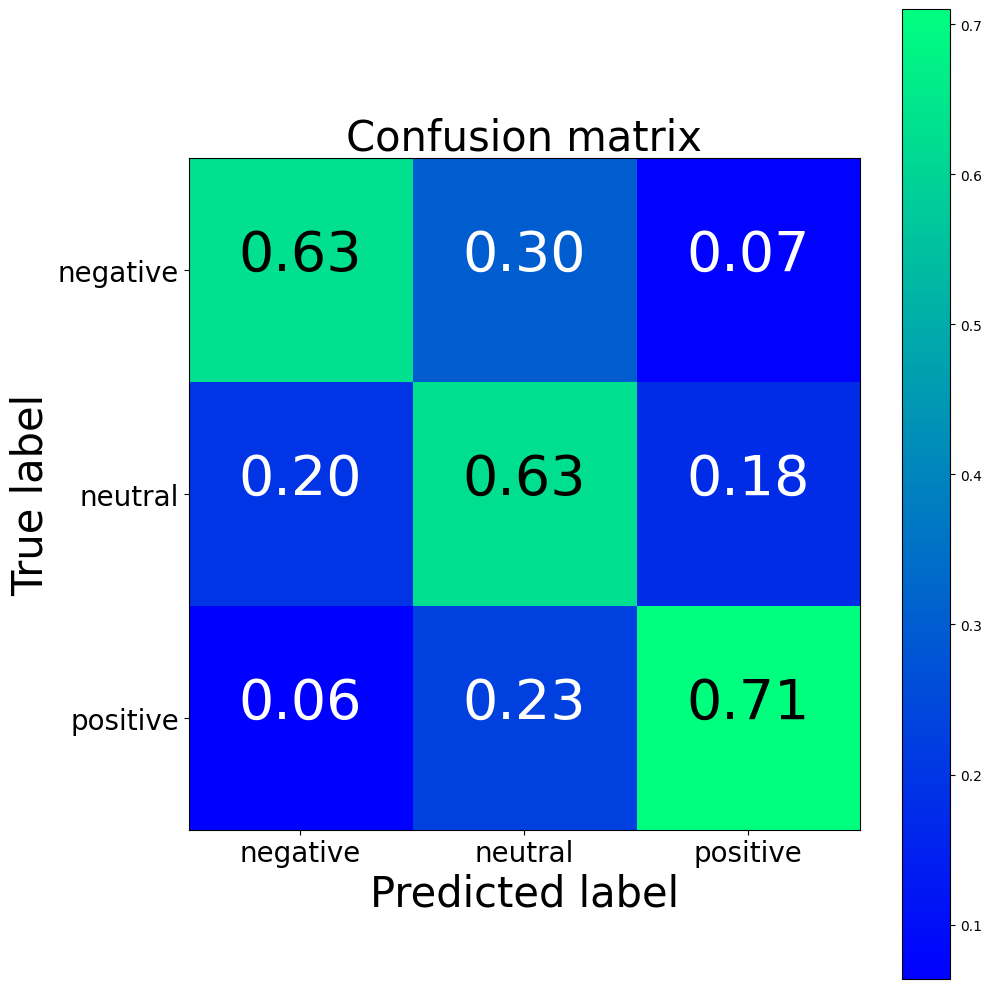

Word2Vec confusion matrix
[[1081  381   98]
 [ 446 1379  418]
 [ 126  361 1207]]
TFIDF confusion matrix
[[1019  441  100]
 [ 447 1400  396]
 [ 104  358 1232]]
BoW confusion matrix
[[ 985  468  107]
 [ 441 1402  400]
 [ 108  383 1203]]


In [81]:
cm_w2v = confusion_matrix(y_test_word2vec, y_predicted_word2vec)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['negative','neutral','positive'], normalize=True, title='Confusion matrix')
plt.show()
print("Word2Vec confusion matrix")
print(cm_w2v)
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

In [82]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(list_corpus, list_labels, test_size=0.2,
                                                                                random_state=40)
vector_store = word2vec
def word2vec_pipeline(examples):
    global vector_store
    tokenizer = RegexpTokenizer(r'\w+')
    tokenized_list = []
    for example in examples:
        example_tokens = tokenizer.tokenize(example)
        vectorized_example = get_average_word2vec(example_tokens, vector_store, generate_missing=False, k=300)
        tokenized_list.append(vectorized_example)
    return clf_w2v.predict_proba(tokenized_list)

c = make_pipeline(count_vectorizer, clf)

In [83]:
def explain_one_instance(instance, class_names):
    explainer = LimeTextExplainer(class_names=class_names)
    exp = explainer.explain_instance(instance, word2vec_pipeline, num_features=6)
    return exp

def visualize_one_exp(features, labels, index, class_names = ['negative','neutral','positive']):
    exp = explain_one_instance(features[index], class_names = class_names)
    print('Index: %d' % index)
    print('True class: %s' % class_names[labels[index]])
    exp.show_in_notebook(text=True)

In [84]:
visualize_one_exp(X_test_data, y_test_data, 65)

Index: 65
True class: positive


In [85]:
visualize_one_exp(X_test_data, y_test_data, 60)

Index: 60
True class: neutral


In [86]:
import random
from collections import defaultdict

random.seed(40)

def get_statistical_explanation(test_set, sample_size, word2vec_pipeline, label_dict):
    sample_sentences = random.sample(test_set, sample_size)
    explainer = LimeTextExplainer()

    labels_to_sentences = defaultdict(list)
    contributors = defaultdict(dict)

    # First, find contributing words to each class
    for sentence in sample_sentences:
        probabilities = word2vec_pipeline([sentence])
        curr_label = probabilities[0].argmax()
        labels_to_sentences[curr_label].append(sentence)
        exp = explainer.explain_instance(sentence, word2vec_pipeline, num_features=6, labels=[curr_label])
        listed_explanation = exp.as_list(label=curr_label)

        for word,contributing_weight in listed_explanation:
            if word in contributors[curr_label]:
                contributors[curr_label][word].append(contributing_weight)
            else:
                contributors[curr_label][word] = [contributing_weight]

    # average each word's contribution to a class, and sort them by impact
    average_contributions = {}
    sorted_contributions = {}
    for label,lexica in contributors.items():
        curr_label = label
        curr_lexica = lexica
        average_contributions[curr_label] = pd.Series(index=curr_lexica.keys())
        for word,scores in curr_lexica.items():
            average_contributions[curr_label].loc[word] = np.sum(np.array(scores))/sample_size
        detractors = average_contributions[curr_label].sort_values()
        supporters = average_contributions[curr_label].sort_values(ascending=False)
        sorted_contributions[label_dict[curr_label]] = {
            'detractors':detractors,
             'supporters': supporters
        }
    return sorted_contributions

label_to_text = {
    0: 'Negative',
    1: 'Neutral',
    2: 'Positive'
}
sorted_contributions = get_statistical_explanation(X_test_data, 100, word2vec_pipeline, label_to_text)

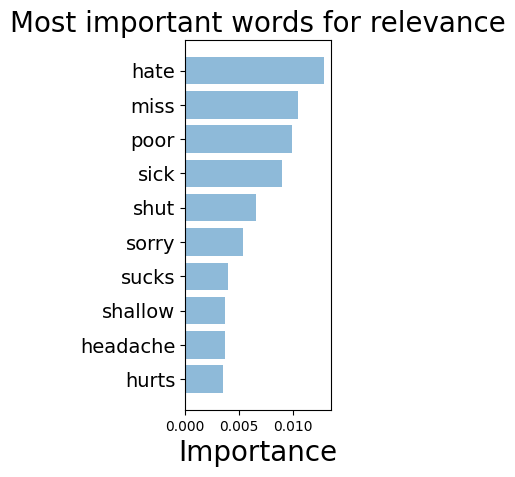

In [87]:
# First index is the class (Disaster)
# Second index is 0 for detractors, 1 for supporters
# Third is how many words we sample
top_words = sorted_contributions['Negative']['supporters'][:10].index.tolist()
top_scores = sorted_contributions['Negative']['supporters'][:10].tolist()
bottom_words = sorted_contributions['Negative']['detractors'][:10].index.tolist()
bottom_scores = sorted_contributions['Negative']['detractors'][:10].tolist()

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, 'Negative', "Most important words for relevance", 1)

In [88]:
from tensorflow.keras.preprocessing.text  import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

EMBEDDING_DIM = 300
MAX_SEQUENCE_LENGTH = 35
VOCAB_SIZE = len(VOCAB)

VALIDATION_SPLIT=.2
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(df["text"].tolist())
sequences = tokenizer.texts_to_sequences(df["text"].tolist())

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

cnn_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(df["sentiment_"]))

indices = np.arange(cnn_data.shape[0])
np.random.shuffle(indices)
cnn_data = cnn_data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * cnn_data.shape[0])

embedding_weights = np.zeros((len(word_index)+1, EMBEDDING_DIM))
for word,index in word_index.items():
    embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(embedding_weights.shape)

Found 26597 unique tokens.
(26598, 300)


In [89]:
from keras.layers import Dense, Input, Flatten, Dropout, Concatenate
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import LSTM, Bidirectional
from keras.models import Model

def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index, trainable=False, extra_conv=True):

    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=trainable)

    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    # Yoon Kim model (https://arxiv.org/abs/1408.5882)
    convs = []
    filter_sizes = [3,4,5]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=128, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(pool_size=3)(l_conv)
        convs.append(l_pool)

    l_merge = Concatenate(axis=1)(convs)

    # add a 1D convnet with global maxpooling, instead of Yoon Kim model
    conv = Conv1D(filters=128, kernel_size=3, activation='relu')(embedded_sequences)
    pool = MaxPooling1D(pool_size=3)(conv)

    if extra_conv==True:
        x = Dropout(0.5)(l_merge)
    else:
        # Original Yoon Kim model
        x = Dropout(0.5)(pool)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    #x = Dropout(0.5)(x)

    preds = Dense(labels_index, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])

    return model

In [90]:
x_train = cnn_data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = cnn_data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

model = ConvNet(embedding_weights, MAX_SEQUENCE_LENGTH, len(word_index)+1, EMBEDDING_DIM,
                len(list(df["sentiment_"].unique())), False)

C:\Users\dima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [91]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3, batch_size=128)

Epoch 1/3
172/172 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - acc: 0.4291 - loss: 1.0649 - val_acc: 0.6707 - val_loss: 0.7662
Epoch 2/3
172/172 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - acc: 0.6762 - loss: 0.7378 - val_acc: 0.7074 - val_loss: 0.7035
Epoch 3/3
172/172 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - acc: 0.7262 - loss: 0.6443 - val_acc: 0.7145 - val_loss: 0.6813


In [92]:
y_pred = model.predict(x_val)

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [93]:
y_pred_cnn = np.argmax(y_pred, axis=1)
y_val_cnn = np.argmax(y_val, axis=1)

In [94]:
accuracy_cnn, precision_cnn, recall_cnn, f1_cnn, r2_cnn = get_metrics(y_val_cnn, y_pred_cnn)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f, r2 = %.3f" % (accuracy_cnn, precision_cnn, recall_cnn, f1_cnn, r2_cnn))

accuracy = 0.715, precision = 0.718, recall = 0.715, f1 = 0.714, r2 = 0.372


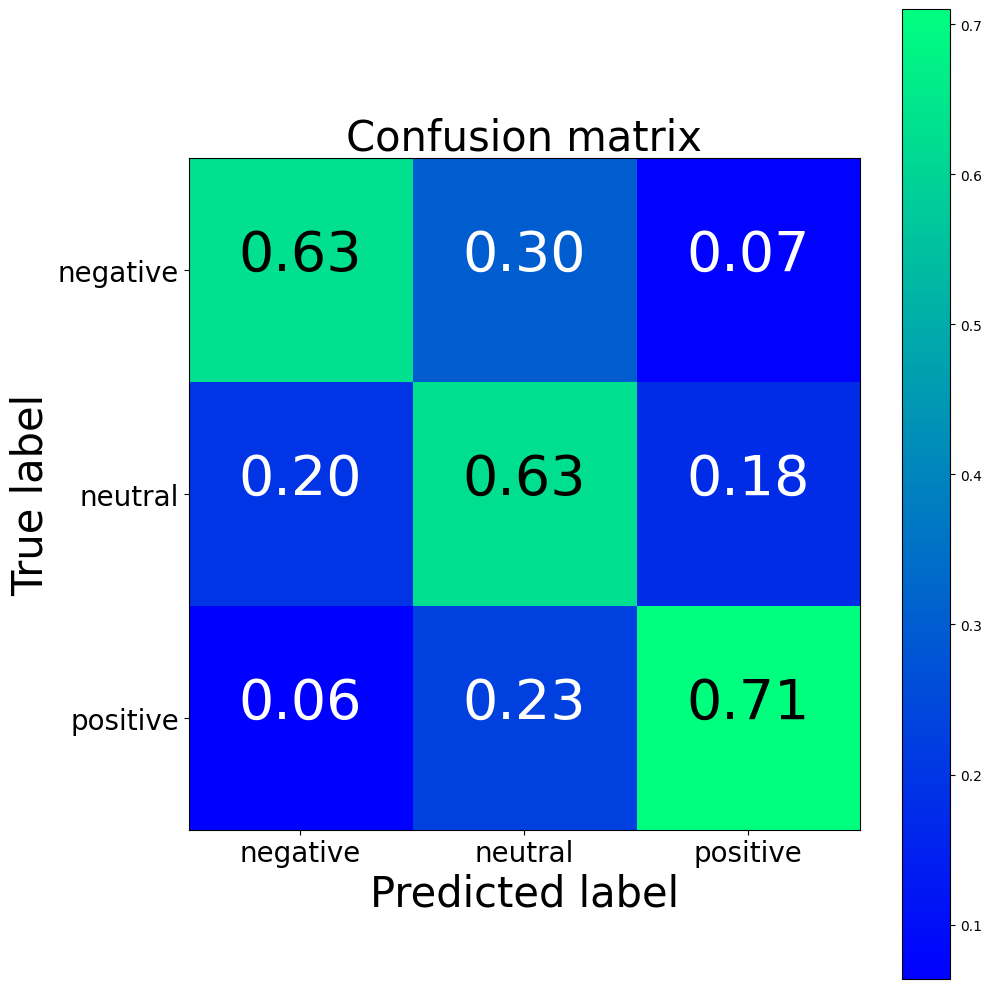

CNN confusion matrix
[[ 979  465   89]
 [ 300 1672  287]
 [  64  364 1276]]
Word2Vec confusion matrix
[[1081  381   98]
 [ 446 1379  418]
 [ 126  361 1207]]
TFIDF confusion matrix
[[1019  441  100]
 [ 447 1400  396]
 [ 104  358 1232]]
BoW confusion matrix
[[ 985  468  107]
 [ 441 1402  400]
 [ 108  383 1203]]


In [95]:
cm_cnn = confusion_matrix(y_val_cnn, y_pred_cnn)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['negative','neutral','positive'], normalize=True, title='Confusion matrix')
plt.show()

print("CNN confusion matrix")
print(cm_cnn)
print("Word2Vec confusion matrix")
print(cm_w2v)
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

In [96]:
import os

# Укажите путь к директории
path = r"C:\Server\data\DB\data"

# Проверяем, существует ли директория
if os.path.exists(path) and os.path.isdir(path):
    # Получаем список всех файлов в директории
    files = os.listdir(path)
    
    # Выводим имена файлов
    for file in files:
        print(file)
else:
    print(f"Директория {path} не существует или это не директория.")

#ib_16384_0.dblwr
#ib_16384_1.dblwr
#innodb_redo
#innodb_temp
auto.cnf
binlog.000006
binlog.000007
binlog.000008
binlog.000009
binlog.000010
binlog.000011
binlog.000012
binlog.000013
binlog.000014
binlog.000015
binlog.000016
binlog.000017
binlog.000018
binlog.000019
binlog.000020
binlog.000021
binlog.000022
binlog.000023
binlog.index
ca-key.pem
ca.pem
client-cert.pem
client-key.pem
DESKTOP-KQHS631.err
DESKTOP-KQHS631.pid
ibdata1
ibtmp1
ib_buffer_pool
mysql
mysql.ibd
mysql_upgrade_history
performance_schema
private_key.pem
public_key.pem
server-cert.pem
server-key.pem
sys
undo_001
undo_002
